In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv('BNB2019-2024.csv')
close_prices = data['Close']

In [3]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 7:3
train_size = int(len(close_prices) * 0.7)
train, test = close_prices[:train_size], close_prices[train_size:]

In [4]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365).fit()

In [5]:
# Dự báo cho tập test
forecast_test = model.predict(start=test.index[0], end=test.index[-1])

In [6]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, forecast_test))
mape_test = mean_absolute_percentage_error(test, forecast_test)
mse_test = mean_squared_error(test, forecast_test)

In [7]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 48.64764486024975
MAPE: 15.28394938845739
MSE: 2366.593350448984


### Dự báo

#### Dự báo 30 ngày

In [8]:
# Dự báo cho 30 ngày tiếp theo
forecast_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(forecast_30_days)

1816    338.787645
1817    307.536570
1818    312.776496
1819    310.836835
1820    296.497206
1821    302.649253
1822    300.608568
1823    296.985328
1824    294.469003
1825    302.469112
1826    317.358020
1827    314.266229
1828    313.405267
1829    304.594723
1830    307.111029
1831    305.354135
1832    310.194430
1833    309.972791
1834    326.367594
1835    317.885349
1836    320.912067
1837    312.984662
1838    313.926132
1839    314.068641
1840    311.717142
1841    315.948156
1842    320.839737
1843    320.464711
1844    322.233932
1845    320.004005
dtype: float64


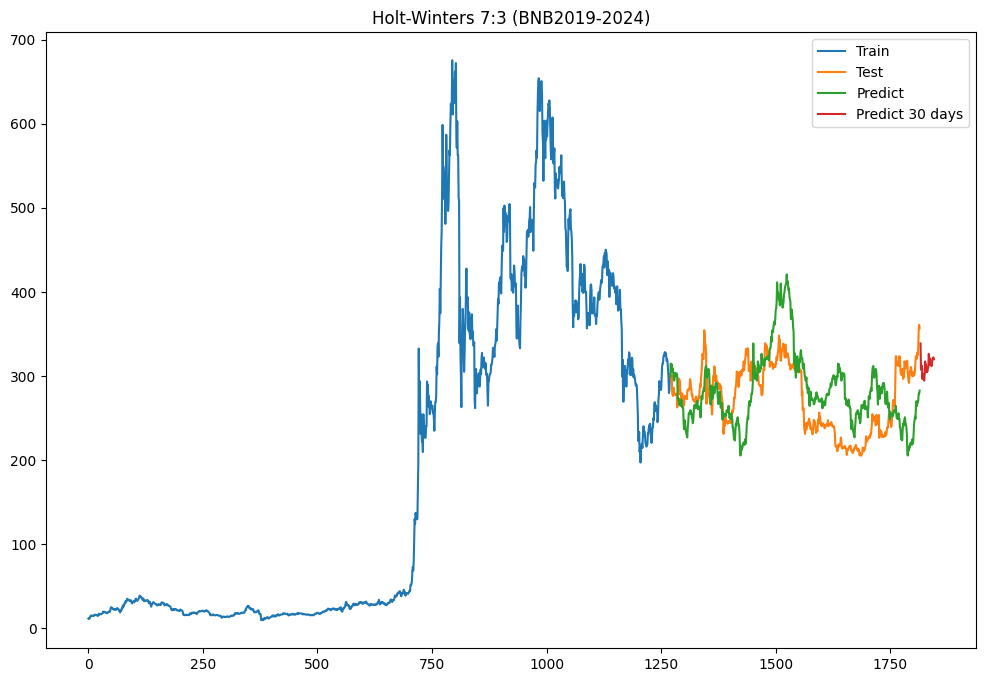

In [9]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_30_days.index, forecast_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [10]:
# Dự báo cho 60 ngày tiếp theo
forecast_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(forecast_60_days)

1816    338.787645
1817    307.536570
1818    312.776496
1819    310.836835
1820    296.497206
1821    302.649253
1822    300.608568
1823    296.985328
1824    294.469003
1825    302.469112
1826    317.358020
1827    314.266229
1828    313.405267
1829    304.594723
1830    307.111029
1831    305.354135
1832    310.194430
1833    309.972791
1834    326.367594
1835    317.885349
1836    320.912067
1837    312.984662
1838    313.926132
1839    314.068641
1840    311.717142
1841    315.948156
1842    320.839737
1843    320.464711
1844    322.233932
1845    320.004005
1846    321.838996
1847    321.448744
1848    323.325832
1849    323.309099
1850    318.711232
1851    325.494504
1852    332.586413
1853    332.499593
1854    335.008873
1855    346.458040
1856    340.901490
1857    354.119937
1858    352.459699
1859    352.000327
1860    358.558557
1861    361.863080
1862    364.845509
1863    361.377682
1864    368.571121
1865    378.620054
1866    380.809912
1867    388.023850
1868    411.

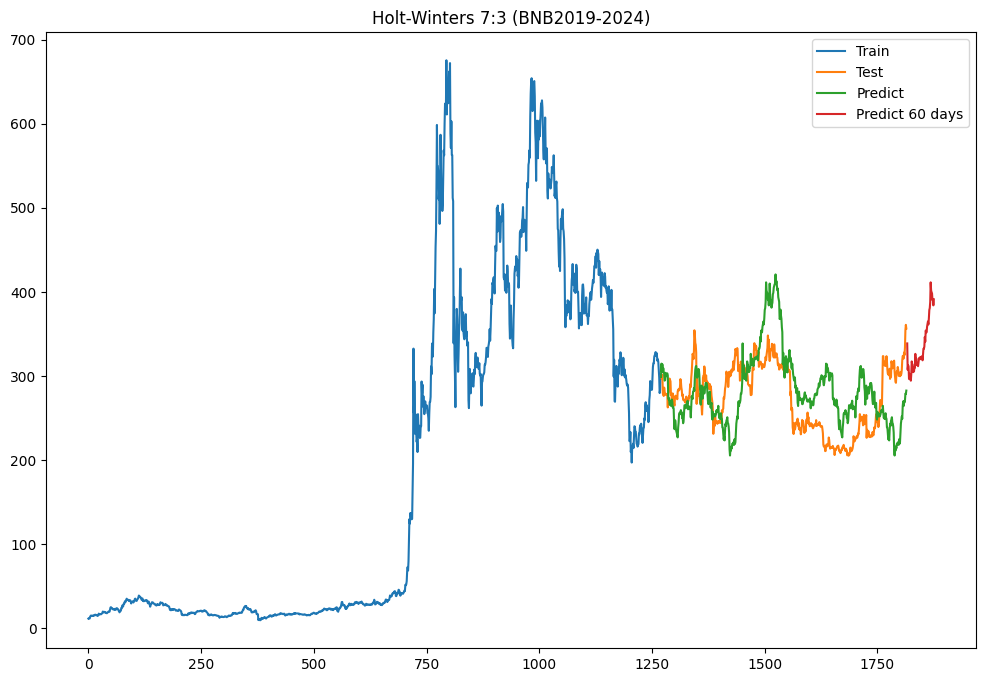

In [11]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_60_days.index, forecast_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [12]:
# Dự báo cho 60 ngày tiếp theo
forecast_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(forecast_90_days)

1816    338.787645
1817    307.536570
1818    312.776496
1819    310.836835
1820    296.497206
           ...    
1901    372.051286
1902    368.071993
1903    357.887418
1904    352.315399
1905    314.720001
Length: 90, dtype: float64


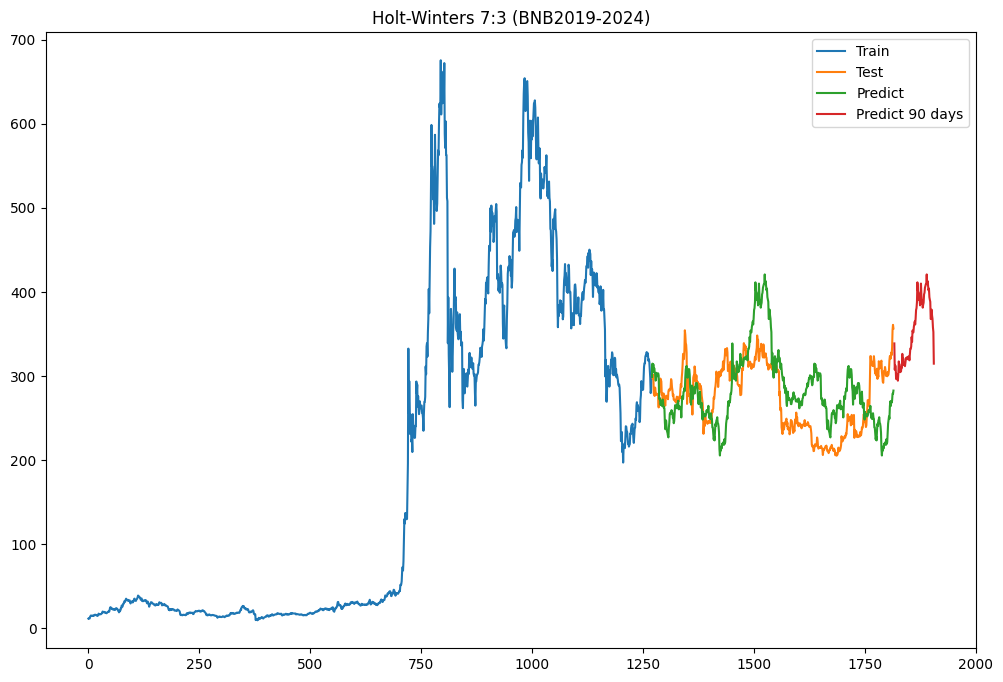

In [13]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_90_days.index, forecast_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()